<a href="https://colab.research.google.com/github/Israelamat/MNIST/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
!pip install tensorflow

In [58]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

In [59]:
mnist_data= tf.keras.datasets.mnist.load_data()

In [60]:
mnist_series = pd.Series(mnist_data)

In [61]:
print(mnist_series.describe())
print()
print(mnist_series.head())

count                                                     2
unique                                                    2
top       ([[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
freq                                                      1
dtype: object

0    ([[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
1    ([[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
dtype: object


In [62]:
(x_train, y_train), (x_test, y_test) = mnist_data
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

seq = models.Sequential([
    layers.Dense(128, activation="relu", input_shape=(784,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation=("softmax"))
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
seq.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
history = seq.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8694 - loss: 0.4505 - val_accuracy: 0.9705 - val_loss: 0.1070
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9675 - loss: 0.1081 - val_accuracy: 0.9718 - val_loss: 0.0902
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9775 - loss: 0.0725 - val_accuracy: 0.9730 - val_loss: 0.0881
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9826 - loss: 0.0538 - val_accuracy: 0.9782 - val_loss: 0.0811
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9862 - loss: 0.0430 - val_accuracy: 0.9778 - val_loss: 0.0752


In [64]:
test_loss, test_acc = seq.evaluate(x_test, y_test)
print(f"Precisión en test: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.9732 - loss: 0.0894
Precisión en test: 0.9765


In [65]:
y_pred = seq.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



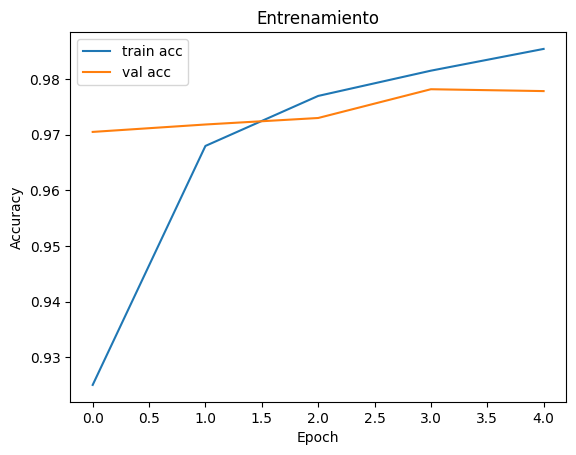

In [66]:
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Entrenamiento")
plt.legend()
plt.show()